# Clustering tendency of methylation probes in Figueroa 2009

In [9]:
library(factoextra)
library(ade4)

In [1]:
# load data for methylation array, z score transformation across patients and cluster on probes
methylation <- read.csv('../data/Figueroa/data/methylation-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T)
sd.methylation <- apply(methylation[,-seq(2)], 1, function(x) sd(x))
probes.idx <- sd.methylation > 1
methylation.filtered <- methylation[probes.idx,]

In [6]:
cluster.data <- data.matrix(methylation.filtered[,-seq(2)])
cluster.zscore <- apply(cluster.data, 2, function(x) scale(x))
colnames(cluster.zscore) <- colnames(cluster.data)

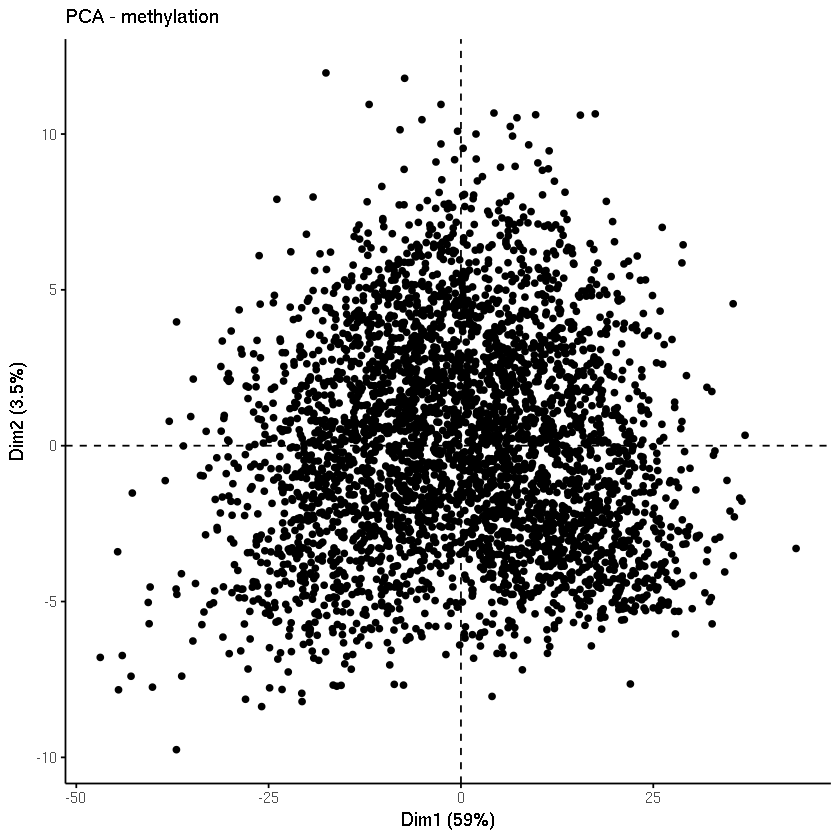

In [7]:
# pca plot for probes
fviz_pca_ind(prcomp(cluster.zscore), title = "PCA - methylation", 
             geom = "point", ggtheme = theme_classic(),
             legend = "bottom")